In [ ]:
print(">>>> Installing dependencies <<<<")
# !conda install numpy
# !conda install scipy
# !conda install scikit-learn
# !conda install tensorflow
#!pip install pandas
# !pip install matplotlib
# !conda install keras
# !pip install --upgrade tensorflow
# !pip install --upgrade keras numpy

In [ ]:
print('>>>> Importing necessary Libraries! <<<<')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from keras import layers

In [67]:
print('>>>> Loading Dataset "IMDB Dataset.csv" <<<<')
dataset = pd.read_csv('IMDB Dataset.csv')
print(dataset)

>>>> Loading Dataset "IMDB Dataset.csv" <<<<
                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [68]:
print('>>>> Splitting data into training and testing sets <<<<')
x = dataset['review']
y = dataset['sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# print(x_train)
# print(x_test)
# print(y_train)
# print(y_test)

>>>> Splitting data into training and testing sets <<<<


In [69]:
print('>>>> Creating TF-IDF vector for the data <<<<')
vector = TfidfVectorizer(stop_words='english')
X_train = vector.fit_transform(x_train)
X_test = vector.transform(x_test)
# print(X_train)
# print(X_test)

>>>> Creating TF-IDF vector for the data <<<<


In [70]:
print('>>>> Training Logistic regression model, predicting and finding accuracy <<<<')
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_accur = metrics.accuracy_score(y_test, log_reg_pred)
log_reg_f1 = metrics.f1_score(y_test, log_reg_pred, average='weighted')
# print(log_reg_pred)
# print(log_reg_accur)

>>>> Training Logistic regression model, predicting and finding accuracy <<<<


In [71]:
print('>>>> Training Naive-Bayes model, predicting and finding accuracy <<<<')
nai_bay = MultinomialNB()
nai_bay.fit(X_train, y_train)
nai_bay_pred = nai_bay.predict(X_test)
nai_bay_accur = metrics.accuracy_score(y_test, nai_bay_pred)
nai_bay_f1 = metrics.f1_score(y_test, nai_bay_pred, average='weighted')
# print(nai_bay_pred)
# print(nai_bay_accur)

>>>> Training Naive-Bayes model, predicting and finding accuracy <<<<


In [72]:
print('>>>> Accuracy of the models <<<<\n')
print(f'Logistic Regression model accuracy : {round(log_reg_accur * 100, 2)}%')
print(f'Naive-Bayes model accuracy : {round(nai_bay_accur * 100, 2)}%\n')
print(f'Logistic Regression model F1 score : {round(log_reg_f1 * 100, 2)}%')
print(f'Naive-Bayes model F1 score : {round(nai_bay_f1 * 100, 2)}%\n')
if log_reg_accur > nai_bay_accur:
    print('>>>> Logistic Regression model outperforms Naive-Bayes model <<<<')
else:
    print('>>>> Naive-Bayes model outperforms Logistic Regression model <<<<')

>>>> Accuracy of the models <<<<

Logistic Regression model accuracy : 89.41%
Naive-Bayes model accuracy : 86.52%

>>>> Logistic Regression model outperforms Naive-Bayes model <<<<


>>>> Plotting Accuracy graph <<<<


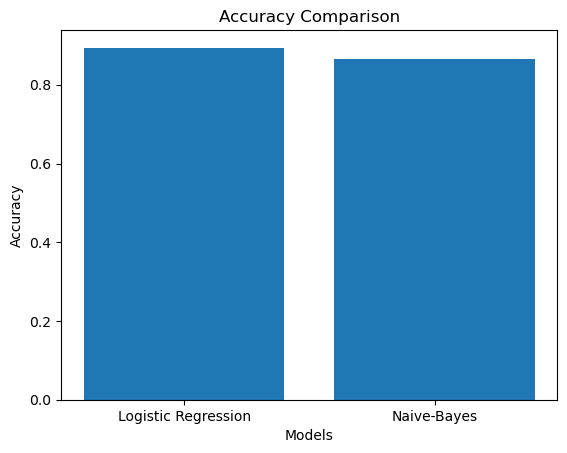

In [73]:
print('>>>> Plotting Accuracy graph <<<<')
models, accuracy = ['Logistic Regression', 'Naive-Bayes'], [log_reg_accur, nai_bay_accur]
plt.title('Accuracy Comparison')
plt.bar(models, accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
Explanation:
Our Linear regression model is a linear model which tries to find a decision boundary that sereates the classes, while our 
Naive-Bayes model is a probalistic model and both have differnt assumptions. Linear regression mode; assumes that the data provided
can be linearly seperated by a staight line and makes decision on that assumptions, and our Naive-Bayes assumes that all features 
are independent to eachother and contribute equally to the classification. The data the we provied can be seprarated
using a liniar line in 2d-space and no need for probabilistic assumptions. Which is why our Logistic regression model
performs better than Naive-Bayes model.

In [74]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

from sklearn.metrics import f1_score

In [75]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

X_train = tokenizer.texts_to_sequences(x_train)
X_test = tokenizer.texts_to_sequences(x_test)

vocab_size = len(tokenizer.word_index) + 1
# print(vocab_size)

In [76]:
maxlen = 100
trunc_type = 'post'
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen, truncating=trunc_type, value=0)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen, truncating=trunc_type, value=0)
print(X_train[0, :])

[  197    48    10   801  2160   534   302     1   107  1907  2038  4324
  6550     2   815  4844    12 22579     1 13693   227     1  6190    79
   782    53    52    22   101     4     1    27  2009   102    36    25
    34   119  1130    12     9     6  2366  1190     5   454    48   552
     5    92    33    23    39   916   400 29670    15     1   166     5
  2993    24 38443  4359    20     3  2945    12    45    75   221    73
   126     8    81  3155   195    20   239     2     1   447     7     7
    10   205  4982   144    21    63    27    15 14644    74   365   302
     3    19    18     9]


In [77]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath, encoding='utf-8') as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix


In [78]:
embedding_dim = 100
embedding_matrix = create_embedding_matrix('glove.6B.100d.txt', tokenizer.word_index, embedding_dim)

In [98]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=100, trainable=False))
model.add(LSTM(64, dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          11228100  
                                                                 
 lstm_2 (LSTM)               (None, 64)                42240     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,270,405
Trainable params: 42,305
Non-trainable params: 11,228,100
_________________________________________________________________


In [110]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [111]:
x_valid,test_1, y_valid, test_2 = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
print(x_valid.shape,y_valid.shape)

(36000,) (36000,)


In [112]:
model.fit(x_train, y_train, batch_size=128, epochs=25, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/25


UnimplementedError: Graph execution error:

Detected at node 'sequential_8/Cast' defined at (most recent call last):
    File "C:\Users\ASUS\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\ASUS\anaconda3\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\ASUS\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\ASUS\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\ASUS\anaconda3\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\ASUS\anaconda3\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "C:\Users\ASUS\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_15044\492571409.py", line 1, in <module>
      model.fit(x_train, y_train, batch_size=128, epochs=25, verbose=1, validation_data=(x_valid, y_valid))
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\functional.py", line 651, in _run_internal_graph
      y = self._conform_to_reference_input(y, ref_input=x)
    File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\functional.py", line 748, in _conform_to_reference_input
      tensor = tf.cast(tensor, dtype=ref_input.dtype)
Node: 'sequential_8/Cast'
Cast string to float is not supported
	 [[{{node sequential_8/Cast}}]] [Op:__inference_train_function_13746]

In [121]:
!pip uninstall tensorflow
!pip uninstall tensorflow-intel
!pip install tensorflow

^C
^C
  Using cached numpy-1.23.5-cp310-cp310-win_amd64.whl (14.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


In [119]:
!pip install --upgrade tensorflow
!pip install --upgrade keras numpy

     ---------------------------------------- 14.8/14.8 MB 1.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
